![Python_logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


   # **Cortex Game: Round1--Amount**

> Before playing the game, you need to connect to SASPy first.
>
>> If it is your first time, please follow the 4 steps mentioned below!

***
## **Connect to SASPy**

**0- Connect to your Google Drive folder**

In [1]:
my_folder = "/content/drive/MyDrive/Python-SAS"

from google.colab import drive
drive.mount('/content/drive')

# Change the following code to set your Drive folder
import os
os.chdir(my_folder)
!pwd

Mounted at /content/drive
/content/drive/MyDrive/Python-SAS


**1- Make sure that your Python version is 3.3 or higher as well as your Java version is 1.8.0_162 or higher**

In [2]:
!echo "Python is at" $(which python)
!python --version

Python is at /usr/local/bin/python
Python 3.8.15


In [3]:
!echo "Java is at" $(which java)
!/usr/bin/java -version

Java is at /usr/bin/java
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


**2- Install SASPy**

In [4]:
!pip install saspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 7.3 MB/s 
  Created wheel for saspy: filename=saspy-4.4.1-py3-none-any.whl size=9937304 sha256=cb027e75703b2d664108fb08aa09aab43440fca5945b5a99aa120bf4191771eb
  Stored in directory: /root/.cache/pip/wheels/0a/f6/ab/f7173c8a824856c66f6fd50194bb8fd3ef93fb4f1824be8d0c
Successfully built saspy


**3- Create the configuration file "sascfg_personal.py"**
Please, check that your Home Region is correct, you can check it at [ODA-SAS](https://welcome.oda.sas.com/home)

In [5]:
%%writefile sascfg_personal.py
SAS_config_names=['oda']
oda = {'java' : '/usr/bin/java',
#US Home Region 1
'iomhost' : ['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'],
#US Home Region 2
#'iomhost' : ['odaws01-usw2-2.oda.sas.com','odaws02-usw2-2.oda.sas.com'],
#European Home Region 1
#'iomhost' : ['odaws01-euw1.oda.sas.com','odaws02-euw1.oda.sas.com'],
#Asia Pacific Home Region 1
#'iomhost' : ['odaws01-apse1.oda.sas.com','odaws02-apse1.oda.sas.com'],
#Asia Pacific Home Region 2
#'iomhost' : ['odaws01-apse1-2.oda.sas.com','odaws02-apse1-2.oda.sas.com'],
'iomport' : 8591,
'authkey' : 'oda',
'encoding' : 'utf-8'
}

Overwriting sascfg_personal.py


**4- Create your .authinfo**

If there is no .authinfo file, you can create this

In [6]:
%%writefile .authinfo
oda user A01652277@tec.mx password Legoland44%

Overwriting .authinfo


Copy this file to home

In [7]:
!cp .authinfo ~/.authinfo

**5- Establish Connection (Need to do this step each time you use SASPy)**

In [8]:
import saspy
sas_session = saspy.SASsession(cfgfile="/content/drive/MyDrive/Python-SAS/sascfg_personal.py")
sas_session

Using SAS Config named: oda
SAS Connection established. Subprocess id is 382



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /content/drive/MyDrive/Python-SAS/sascfg_personal.py
WORK Path             = /saswork/SAS_workDCF200012165_odaws02-usw2.oda.sas.com/SAS_work97EF00012165_odaws02-usw2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 4.4.1
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 74085


***
## Connect to Cortex Data Sets

Load Cortex datasets from SAS Studio

In [9]:
ps = sas_session.submit("""
    libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
    """)
print(ps["LOG"])


5                                                          The SAS System                      Friday, December  2, 2022 02:59:00 PM

24         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
24       ! ods graphics on / outputfmt=png;
25         
26         
27             libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
28         
29         
30         
31         ods html5 (id=saspy_internal) close;ods listing;
32         

6                                                          The SAS System                      Friday, December  2, 2022 02:59:00 PM

33         


For local Jupyter

In [10]:
#%%SAS sas_session
#libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';

# Transform cloud SAS dataset to Python dataframe (pandas)


> **For reference**:

> 1. [Pandas library](https://pandas.pydata.org/docs/user_guide/index.html)

> 2. [sklearn.model_selection for data partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


In [11]:
## Librerías para la manipulación de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Librerías para aplicar modelos ML
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Ridge
from sklearn.svm import SVR


## Librerías para la evaluación de los modelos
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, accuracy_score # Medidas de evaluación
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Librerías adicionales
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE # Selección de características
from sklearn.model_selection import GridSearchCV # Ajuste de hiperparámetros
from sklearn import preprocessing # Transformaciones de los datos
from sklearn.model_selection import KFold

pd.options.display.max_columns = None

In [32]:
## Importación de las bases de datos
data1 = sas_session.sasdata2dataframe(
table='hist',
libref='cortex'
)

data2 = sas_session.sasdata2dataframe(
table='target_rd2',
libref='cortex'
)

## Merge the Data

In [33]:
## Unión de las bases de datos
data_merge = pd.merge(data1, data2, on=["ID"],how="right")
data_merge.head()

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
0,2000001.0,ROMMES,RODNEY,0.0,25.0,107200.0,University / College,City,2.0,0.0,0.0,1.0,2.0,2.0,1010.0,10.0,1000.0,0.0,0.0,1.0,0.0,0.0
1,2000002.0,RAMIREZ,SHARON,1.0,38.0,15800.0,High School,Rural,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0
2,2000003.0,TSOSIE,KAREN,1.0,37.0,57400.0,University / College,Rural,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
3,2000004.0,LEE,MARY,1.0,78.0,23700.0,High School,Rural,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,20.0
4,2000005.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,University / College,Rural,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


# Data Exploration

In [36]:
## Dimensions
data_merge.shape

(1000000, 22)

In [37]:
## Basic informaion about the variables
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   ID            1000000 non-null  float64
 1   LastName      999977 non-null   object 
 2   FirstName     999996 non-null   object 
 3   Woman         1000000 non-null  float64
 4   Age           1000000 non-null  float64
 5   Salary        1000000 non-null  float64
 6   Education     1000000 non-null  object 
 7   City          1000000 non-null  object 
 8   SeniorList    1000000 non-null  float64
 9   NbActivities  1000000 non-null  float64
 10  Referrals     1000000 non-null  float64
 11  Recency       336334 non-null   float64
 12  Frequency     336334 non-null   float64
 13  Seniority     336334 non-null   float64
 14  TotalGift     336334 non-null   float64
 15  MinGift       336334 non-null   float64
 16  MaxGift       336334 non-null   float64
 17  GaveLastYear  1000000 non-nu

In [38]:
## overview of some metrics of the numeric variables.
data_merge.describe()

,ID,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,336334.000000,336334.000000,336334.000000,336334.000000,336334.000000,336334.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000,1000000.000000
mean,2.500000e+06,0.516936,46.366170,65531.654000,4.582967,0.561413,0.560556,3.039636,1.666882,4.474148,104.454055,43.130251,85.897932,0.122101,7.673015,0.1,0.149457,9.409665
std,2.886753e+05,0.499713,18.945324,61051.122343,3.325844,0.996803,1.054027,2.120722,1.052090,2.588119,303.760477,150.249476,283.581066,0.327403,82.224854,0.3,0.356539,90.917731
min,2.000001e+06,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,2.250001e+06,0.000000,30.000000,20700.000000,2.000000,0.000000,0.000000,1.000000,1.000000,2.000000,20.000000,15.000000,20.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,2.500000e+06,1.000000,46.000000,44000.000000,4.000000,0.000000,0.000000,2.000000,1.000000,4.000000,40.000000,20.000000,30.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,2.750000e+06,1.000000,61.000000,91200.000000,7.000000,1.000000,1.000000,4.000000,2.000000,6.000000,90.000000,30.000000,75.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,3.000000e+06,1.000000,90.000000,250000.000000,10.000000,10.000000,16.000000,10.000000,10.000000,10.000000,15150.000000,10000.000000,10000.000000,1.000000,10000.000000,1.0,1.000000,10000.000000


In [39]:
## Estadística descriptiva de subconjunto de personas que donaron en este año
donadores = data_merge.loc[data_merge['AmtThisYear'] != 0]
donadores.describe()

,ID,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
count,1.494570e+05,149457.000000,149457.000000,149457.000000,149457.000000,149457.000000,149457.000000,68433.000000,68433.000000,68433.000000,68433.000000,68433.000000,68433.000000,149457.000000,149457.000000,149457.000000,149457.0,149457.000000
mean,2.499355e+06,0.544979,45.256642,63898.012137,4.415210,0.917361,0.911459,2.750910,1.985796,4.674952,134.864685,42.502521,106.674485,0.208207,14.167085,0.261286,1.0,62.959012
std,2.887997e+05,0.497974,18.915539,60194.539355,3.345957,1.334288,1.412152,1.956686,1.297829,2.613877,372.981373,160.658491,344.831631,0.406027,121.163666,0.439337,0.0,227.894674
min,2.000004e+06,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,1.0,10.000000
25%,2.249026e+06,0.000000,29.000000,20300.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,25.000000,10.000000,20.000000,0.000000,0.000000,0.000000,1.0,20.000000
50%,2.499486e+06,1.000000,44.000000,43000.000000,4.000000,0.000000,0.000000,2.000000,2.000000,4.000000,50.000000,20.000000,30.000000,0.000000,0.000000,0.000000,1.0,25.000000
75%,2.749383e+06,1.000000,59.000000,87000.000000,7.000000,1.000000,1.000000,4.000000,3.000000,7.000000,115.000000,30.000000,75.000000,0.000000,0.000000,1.000000,1.0,50.000000
max,2.999999e+06,1.000000,90.000000,250000.000000,10.000000,10.000000,15.000000,10.000000,10.000000,10.000000,12160.000000,10000.000000,10000.000000,1.000000,10000.000000,1.000000,1.0,10000.000000


In [40]:
## Estadística descriptiva de subconjunto de personas que no donaron en este año
no_donadores = data_merge.loc[data_merge['AmtThisYear'] == 0]
no_donadores.describe()

,ID,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
count,8.505430e+05,850543.000000,850543.000000,850543.000000,850543.000000,850543.000000,850543.000000,267901.000000,267901.000000,267901.000000,267901.000000,267901.000000,267901.000000,850543.000000,850543.000000,850543.000000,850543.0,850543.0
mean,2.500114e+06,0.512008,46.561136,65818.716749,4.612445,0.498866,0.498895,3.113389,1.585418,4.422854,96.685921,43.290600,80.590741,0.106970,6.531880,0.071659,0.0,0.0
std,2.886534e+05,0.499856,18.943852,61195.932493,3.321424,0.910605,0.964541,2.154436,0.962691,2.578997,282.857304,147.472712,265.420602,0.309076,73.215998,0.257922,0.0,0.0
min,2.000001e+06,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,2.250182e+06,0.000000,30.000000,20700.000000,2.000000,0.000000,0.000000,1.000000,1.000000,2.000000,20.000000,20.000000,20.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,2.500088e+06,1.000000,46.000000,44200.000000,5.000000,0.000000,0.000000,2.000000,1.000000,4.000000,40.000000,20.000000,30.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,2.750128e+06,1.000000,61.000000,91900.000000,8.000000,1.000000,1.000000,4.000000,2.000000,6.000000,80.000000,30.000000,60.000000,0.000000,0.000000,0.000000,0.0,0.0
max,3.000000e+06,1.000000,90.000000,250000.000000,10.000000,10.000000,16.000000,10.000000,10.000000,10.000000,15150.000000,10000.000000,10000.000000,1.000000,10000.000000,1.000000,0.0,0.0


In [41]:
## Porcentaje de personas que donaron este año y el anterior
print('Porcentaje de donadores el año pasado:', data_merge[data_merge['AmtLastYear'] != 0].shape[0] / data_merge.shape[0])
print('Porcentaje de donadores este año:', data_merge[data_merge['AmtThisYear'] != 0].shape[0] / data_merge.shape[0])

## Porcentaje de personas que donaron este año y el anterior
print('Porcentaje de no donadores el año pasado:', data_merge[data_merge['AmtLastYear'] == 0].shape[0] / data_merge.shape[0])
print('Porcentaje de no donadores este año:', data_merge[data_merge['AmtThisYear'] == 0].shape[0] / data_merge.shape[0])

Porcentaje de donadores el año pasado: 0.122101
Porcentaje de donadores este año: 0.149457
Porcentaje de no donadores el año pasado: 0.877899
Porcentaje de no donadores este año: 0.850543


### Some basic graphics

<ipython-input-42-6fda88522a62>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data_merge.hist(ax = ax)


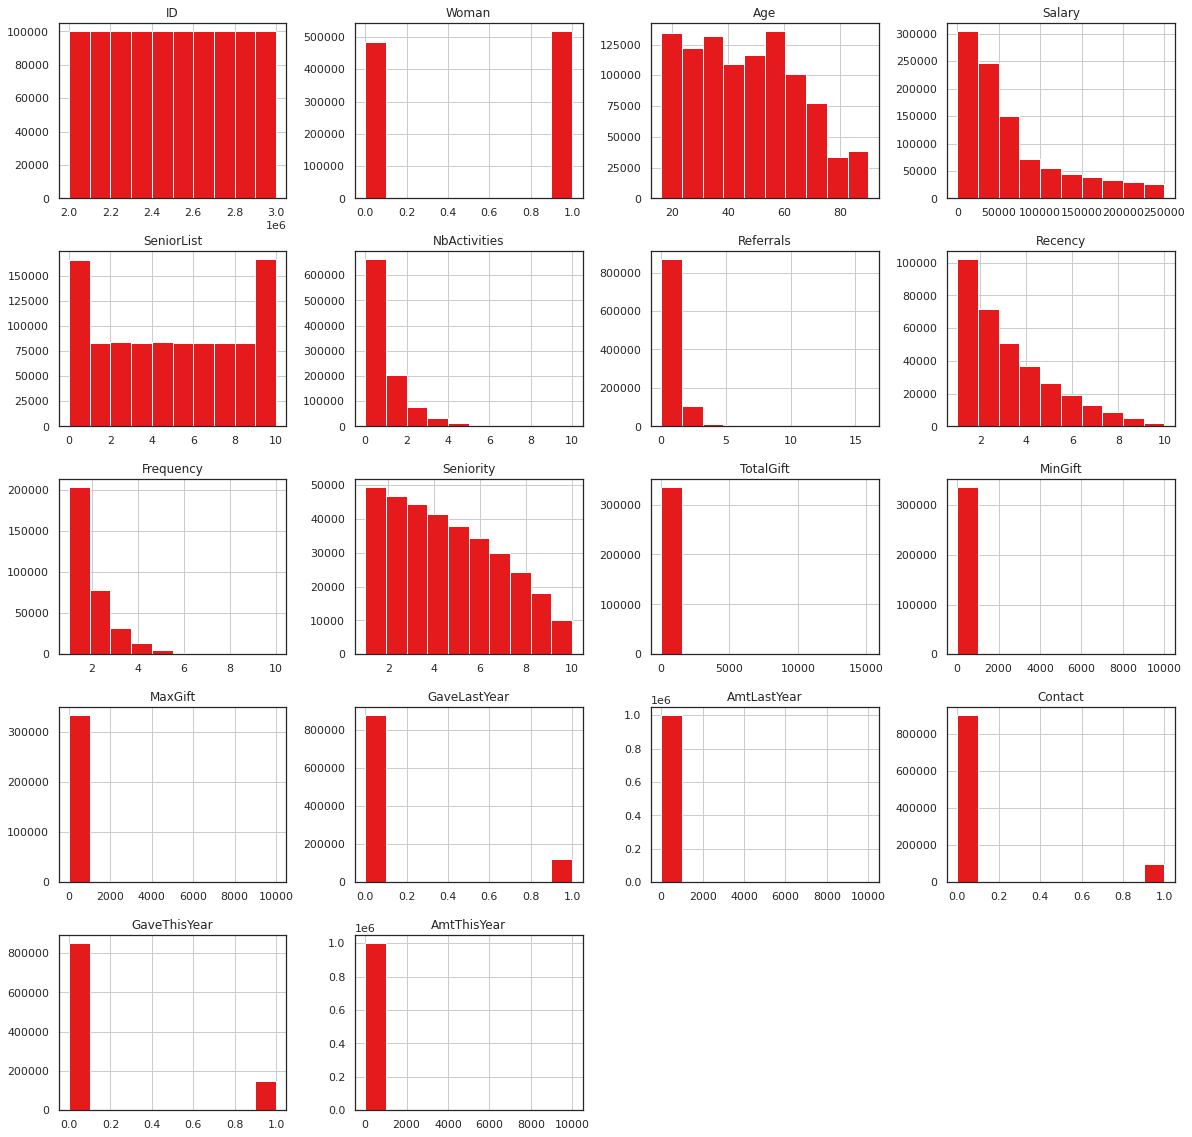

In [42]:
## Histogramas de frecuencia de las variables numéricas
sns.set_palette('Set1')

fig = plt.figure(figsize = (20,20))
ax = fig.gca()
data_merge.hist(ax = ax)
plt.show()

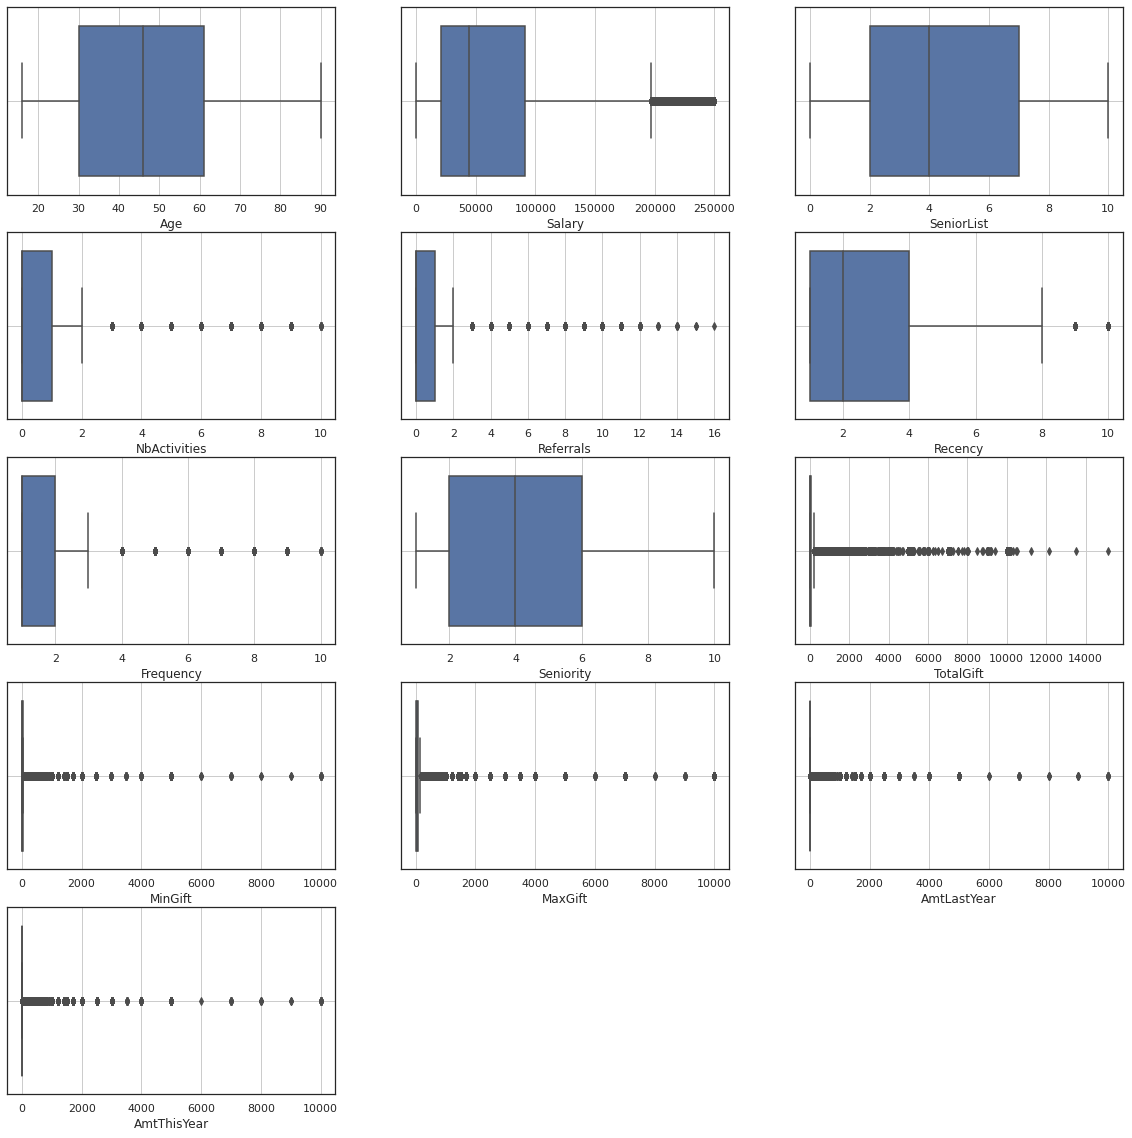

In [43]:
## Diagramas de caja y bigotes
plt.figure(figsize=(20, 20))
plt.subplot(5,3, 1)
sns.set_theme(style='white')
ax = sns.boxplot(x=data_merge['Age'])
#plt.title('Diagrama de caja Pregnancies')
plt.grid()

plt.subplot(5,3, 2)
sns.set_theme(style='white')
ax = sns.boxplot(x=data_merge['Salary'])
#plt.title('Diagrama de caja Glucose')
plt.grid()

plt.subplot(5,3, 3)
sns.set_theme(style='white')
ax = sns.boxplot(x=data_merge['SeniorList'])
#plt.title('Diagrama de caja Blood Pressure')
plt.grid()

plt.subplot(5,3, 4)
sns.set_theme(style='white')
ax = sns.boxplot(x=data_merge['NbActivities'])
#plt.title('Diagrama de caja SkinThickness')
plt.grid()

plt.subplot(5,3, 5)
sns.set_theme(style='white')
ax = sns.boxplot(x=data_merge['Referrals'])
#plt.title('Diagrama de caja Insulin')
plt.grid()

plt.subplot(5,3, 6)
sns.set_theme(style='white')
ax = sns.boxplot(x=data_merge['Recency'])
#plt.title('Diagrama de caja BMI')
plt.grid()

plt.subplot(5,3, 7)
sns.set_theme(style='white')
ax = sns.boxplot(x=data_merge['Frequency'])
#plt.title('Diagrama de caja DiabetesPedigreeFunction')
plt.grid()

plt.subplot(5,3, 8)
sns.set_theme(style='white')
ax = sns.boxplot(x=data_merge['Seniority'])
#plt.title('Diagrama de caja Age')
plt.grid()

plt.subplot(5,3, 9)
sns.set_theme(style='white')
ax = sns.boxplot(x=data_merge['TotalGift'])
#plt.title('Diagrama de caja Age')
plt.grid()

plt.subplot(5,3, 10)
sns.set_theme(style='white')
ax = sns.boxplot(x=data_merge['MinGift'])
#plt.title('Diagrama de caja Age')
plt.grid()

plt.subplot(5,3, 11)
sns.set_theme(style='white')
ax = sns.boxplot(x=data_merge['MaxGift'])
#plt.title('Diagrama de caja Age')
plt.grid()

plt.subplot(5,3, 12)
sns.set_theme(style='white')
ax = sns.boxplot(x=data_merge['AmtLastYear'])
#plt.title('Diagrama de caja Age')
plt.grid()

plt.subplot(5,3, 13)
sns.set_theme(style='white')
ax = sns.boxplot(x=data_merge['AmtThisYear'])
#plt.title('Diagrama de caja Age')
plt.grid()

# Data Cleaning

Las variables que funcionan como identificadores de las personas no serán tomadas en cuenta para el modelo, ya que no hay una correlación entre el nombre y la donación. 



## One Hot Label Encoder
Se aplica un one hot label encoder para transformar las variables 'Education'  y 'City' de cualitativas a cuantitativas

In [44]:
data_merge['Education'].unique()

array(['University / College', 'High School', 'Elementary'], dtype=object)

In [45]:
data_merge = data_merge.join(pd.get_dummies(data_merge.Education, prefix = 'Education'), how = 'inner')
data_merge.drop('Education', axis=1, inplace=True)
data_merge.head()

,ID,LastName,FirstName,Woman,Age,Salary,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear,Education_Elementary,Education_High School,Education_University / College
0,2000001.0,ROMMES,RODNEY,0.0,25.0,107200.0,City,2.0,0.0,0.0,1.0,2.0,2.0,1010.0,10.0,1000.0,0.0,0.0,1.0,0.0,0.0,0,0,1
1,2000002.0,RAMIREZ,SHARON,1.0,38.0,15800.0,Rural,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0,1,0
2,2000003.0,TSOSIE,KAREN,1.0,37.0,57400.0,Rural,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,1
3,2000004.0,LEE,MARY,1.0,78.0,23700.0,Rural,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,20.0,0,1,0
4,2000005.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,Rural,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,1


In [46]:
data_merge['City'].unique()

array(['City', 'Rural', 'Suburban', 'Downtown'], dtype=object)

In [47]:
data_merge = data_merge.join(pd.get_dummies(data_merge.City, prefix = 'City'), how = 'inner')
data_merge.drop('City', axis=1, inplace=True)
data_merge.head()

,ID,LastName,FirstName,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear,Education_Elementary,Education_High School,Education_University / College,City_City,City_Downtown,City_Rural,City_Suburban
0,2000001.0,ROMMES,RODNEY,0.0,25.0,107200.0,2.0,0.0,0.0,1.0,2.0,2.0,1010.0,10.0,1000.0,0.0,0.0,1.0,0.0,0.0,0,0,1,1,0,0,0
1,2000002.0,RAMIREZ,SHARON,1.0,38.0,15800.0,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0,1,0,0,0,1,0
2,2000003.0,TSOSIE,KAREN,1.0,37.0,57400.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0
3,2000004.0,LEE,MARY,1.0,78.0,23700.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,20.0,0,1,0,0,0,1,0
4,2000005.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0


## Missing Values


In [48]:
## Visualización de datos nulos en las variables
data_merge.isnull().sum()

ID                                     0
LastName                              23
FirstName                              4
Woman                                  0
Age                                    0
Salary                                 0
SeniorList                             0
NbActivities                           0
Referrals                              0
Recency                           663666
Frequency                         663666
Seniority                         663666
TotalGift                         663666
MinGift                           663666
MaxGift                           663666
GaveLastYear                           0
AmtLastYear                            0
Contact                                0
GaveThisYear                           0
AmtThisYear                            0
Education_Elementary                   0
Education_High School                  0
Education_University / College         0
City_City                              0
City_Downtown   

### Missing values (MinGift)


In [49]:
# In this case, we are replacing MinGift by 0.
# You can do the same for what you think is reasonable for dealing with the other variables.
data_merge[['MinGift']] = data_merge[['MinGift']].fillna(value=0)  
data_merge.head()

,ID,LastName,FirstName,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear,Education_Elementary,Education_High School,Education_University / College,City_City,City_Downtown,City_Rural,City_Suburban
0,2000001.0,ROMMES,RODNEY,0.0,25.0,107200.0,2.0,0.0,0.0,1.0,2.0,2.0,1010.0,10.0,1000.0,0.0,0.0,1.0,0.0,0.0,0,0,1,1,0,0,0
1,2000002.0,RAMIREZ,SHARON,1.0,38.0,15800.0,4.0,1.0,1.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0,1,0,0,0,1,0
2,2000003.0,TSOSIE,KAREN,1.0,37.0,57400.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0
3,2000004.0,LEE,MARY,1.0,78.0,23700.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,1.0,1.0,20.0,0,1,0,0,0,1,0
4,2000005.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0


### Missing values (Max Gift)


In [50]:
## Se aplica el mismo criterio que con las donaciones mínimas, si no hubo una donación mínima en 10 años, tampoco hubo una
## donación máxima
data_merge[['MaxGift']] = data_merge[['MaxGift']].fillna(value=0)  
data_merge.head()

,ID,LastName,FirstName,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear,Education_Elementary,Education_High School,Education_University / College,City_City,City_Downtown,City_Rural,City_Suburban
0,2000001.0,ROMMES,RODNEY,0.0,25.0,107200.0,2.0,0.0,0.0,1.0,2.0,2.0,1010.0,10.0,1000.0,0.0,0.0,1.0,0.0,0.0,0,0,1,1,0,0,0
1,2000002.0,RAMIREZ,SHARON,1.0,38.0,15800.0,4.0,1.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,0,0,1,0
2,2000003.0,TSOSIE,KAREN,1.0,37.0,57400.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0
3,2000004.0,LEE,MARY,1.0,78.0,23700.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,20.0,0,1,0,0,0,1,0
4,2000005.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0


### Matriz de correlaciones

Ahora, lo que se tratará de hacer, es entrenar un modelo lineal con la información que se tiene para de esta manera poder predecir los datos faltantes de la base. Para esto, primero se divide los reigstros con datos nulos de los registros completos. 

In [51]:
subconjunto = data_merge.loc[data_merge['Recency'].isnull() == False]
subconjunto.head()

,ID,LastName,FirstName,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear,Education_Elementary,Education_High School,Education_University / College,City_City,City_Downtown,City_Rural,City_Suburban
0,2000001.0,ROMMES,RODNEY,0.0,25.0,107200.0,2.0,0.0,0.0,1.0,2.0,2.0,1010.0,10.0,1000.0,0.0,0.0,1.0,0.0,0.0,0,0,1,1,0,0,0
14,2000015.0,HOLMES,LEANN,1.0,39.0,91800.0,10.0,5.0,3.0,1.0,2.0,9.0,70.0,20.0,50.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0
15,2000016.0,JOHNSTON,DONNA,1.0,28.0,72400.0,8.0,0.0,1.0,7.0,2.0,8.0,50.0,20.0,30.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1
19,2000020.0,BAUTISTA,JACKIE,1.0,64.0,40700.0,10.0,1.0,2.0,3.0,3.0,6.0,770.0,20.0,500.0,1.0,20.0,0.0,0.0,0.0,0,1,0,0,0,0,1
28,2000029.0,MILLER,JOHN,0.0,49.0,73500.0,6.0,1.0,0.0,4.0,1.0,4.0,90.0,90.0,90.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0


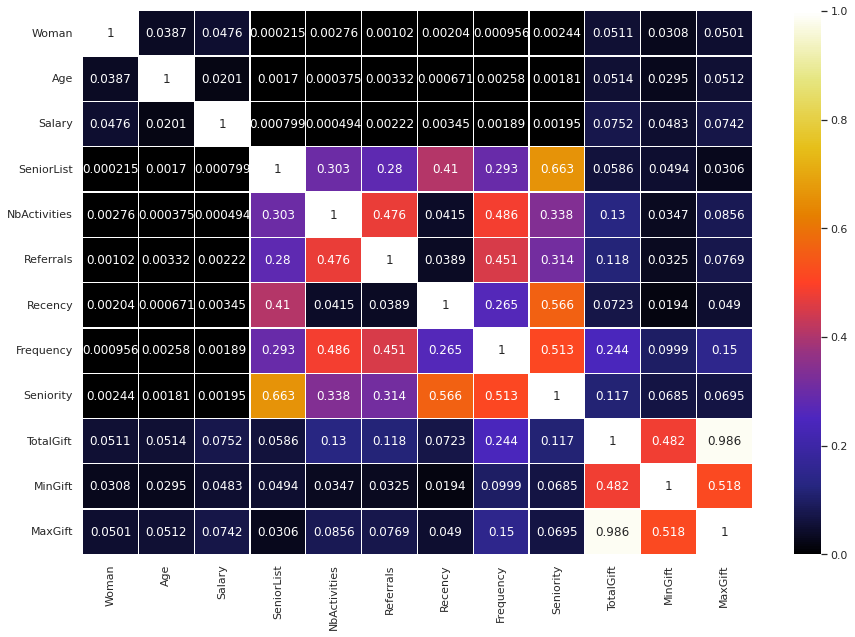

In [52]:
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.heatmap(abs(subconjunto[['Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities', 
                                  'Referrals', 'Recency', 'Frequency', 'Seniority', 'TotalGift', 
                                  'MinGift', 'MaxGift']].corr()), vmin=0, vmax=1,annot=True,linewidths=.3,cmap="CMRmap",fmt='.3g')
plt.savefig('corr_matriz.png',dpi=96)

### Missing values (Recency)

In [53]:
## Vamos a crear un modelo para calcular los valores nulos de la variable Recency usando como predictoras la seis variables
X = subconjunto[['Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities', 'Referrals']]
#X = subconjunto[['SeniorList', 'NbActivities']]
Y = subconjunto['Recency']

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((269067, 6), (67267, 6), (269067,), (67267,))

In [54]:
from sklearn import linear_model
from sklearn import metrics

regr_recency = linear_model.LinearRegression()
regr_recency.fit(X_train, y_train)
regr_predict_recency=regr_recency.predict(X_val)

#MAE
print(metrics.mean_absolute_error(y_val,regr_predict_recency))
#MSE
print(metrics.mean_squared_error(y_val,regr_predict_recency))
#RMSE
print(np.sqrt(metrics.mean_squared_error(y_val,regr_predict_recency)))

1.5024470549544249
3.5886680083886193
1.8943780003971276


In [55]:
subconjunto_nulos = data_merge.loc[data_merge['Recency'].isnull() == True]

X = subconjunto_nulos[['Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities', 'Referrals']] 
regr_predict_end_recency=regr_recency.predict(X)

subconjunto_nulos['Recency'] = regr_predict_end_recency
subconjunto_nulos.head()


<ipython-input-55-079d2fd2480d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subconjunto_nulos['Recency'] = regr_predict_end_recency


,ID,LastName,FirstName,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear,Education_Elementary,Education_High School,Education_University / College,City_City,City_Downtown,City_Rural,City_Suburban
1,2000002.0,RAMIREZ,SHARON,1.0,38.0,15800.0,4.0,1.0,1.0,2.103544,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,0,0,1,0
2,2000003.0,TSOSIE,KAREN,1.0,37.0,57400.0,5.0,0.0,0.0,2.874150,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0
3,2000004.0,LEE,MARY,1.0,78.0,23700.0,3.0,0.0,0.0,2.083237,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,20.0,0,1,0,0,0,1,0
4,2000005.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,8.0,0.0,0.0,4.055461,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0
5,2000006.0,CHEN,NANCY,1.0,80.0,4200.0,5.0,0.0,0.0,2.873275,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0


### Missing values (Frequency)

In [56]:
## Vamos a crear un modelo para calcular los valores nulos de la variable Recency usando como predictoras la seis variables
X = subconjunto[['Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities', 'Referrals']]
Y = subconjunto['Frequency']

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((269067, 6), (67267, 6), (269067,), (67267,))

In [57]:
regr_frequency = linear_model.LinearRegression()
regr_frequency.fit(X_train, y_train)
regr_predict_frequency=regr_frequency.predict(X_val)

#MAE
print(metrics.mean_absolute_error(y_val,regr_predict_frequency))
#MSE
print(metrics.mean_squared_error(y_val,regr_predict_frequency))
#RMSE
print(np.sqrt(metrics.mean_squared_error(y_val,regr_predict_frequency)))

0.6290928201024492
0.7547329770141126
0.8687536917988392


In [58]:
X = subconjunto_nulos[['Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities', 'Referrals']] 
regr_predict_end_frequency=regr_frequency.predict(X)

subconjunto_nulos['Frequency'] = regr_predict_end_frequency
subconjunto_nulos.head()

<ipython-input-58-471b881ca705>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subconjunto_nulos['Frequency'] = regr_predict_end_frequency


,ID,LastName,FirstName,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear,Education_Elementary,Education_High School,Education_University / College,City_City,City_Downtown,City_Rural,City_Suburban
1,2000002.0,RAMIREZ,SHARON,1.0,38.0,15800.0,4.0,1.0,1.0,2.103544,1.475441,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,0,0,1,0
2,2000003.0,TSOSIE,KAREN,1.0,37.0,57400.0,5.0,0.0,0.0,2.874150,1.073094,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0
3,2000004.0,LEE,MARY,1.0,78.0,23700.0,3.0,0.0,0.0,2.083237,0.971259,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,20.0,0,1,0,0,0,1,0
4,2000005.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,8.0,0.0,0.0,4.055461,1.222179,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0
5,2000006.0,CHEN,NANCY,1.0,80.0,4200.0,5.0,0.0,0.0,2.873275,1.070448,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0


### Missing values (Seniority)


In [59]:
## Vamos a crear un modelo para calcular los valores nulos de la variable Seniority usando como predictoras la seis variables
X = subconjunto[['Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities', 'Referrals']]
Y = subconjunto['Seniority']

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((269067, 6), (67267, 6), (269067,), (67267,))

In [60]:
regr_seniority = linear_model.LinearRegression()
regr_seniority.fit(X_train, y_train)
regr_predict_seniority=regr_seniority.predict(X_val)

#MAE
print(metrics.mean_absolute_error(y_val,regr_predict_seniority))
#MSE
print(metrics.mean_squared_error(y_val,regr_predict_seniority))
#RMSE
print(np.sqrt(metrics.mean_squared_error(y_val,regr_predict_seniority)))

1.5029438395802863
3.5920523194184955
1.895271041149127


In [61]:
X = subconjunto_nulos[['Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities', 'Referrals']] 
regr_predict_end_seniority=regr_seniority.predict(X)

subconjunto_nulos['Seniority'] = regr_predict_end_seniority
subconjunto_nulos.head()

<ipython-input-61-57d882412f81>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subconjunto_nulos['Seniority'] = regr_predict_end_seniority


,ID,LastName,FirstName,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear,Education_Elementary,Education_High School,Education_University / College,City_City,City_Downtown,City_Rural,City_Suburban
1,2000002.0,RAMIREZ,SHARON,1.0,38.0,15800.0,4.0,1.0,1.0,2.103544,1.475441,2.896812,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,0,0,1,0
2,2000003.0,TSOSIE,KAREN,1.0,37.0,57400.0,5.0,0.0,0.0,2.874150,1.073094,3.112386,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0
3,2000004.0,LEE,MARY,1.0,78.0,23700.0,3.0,0.0,0.0,2.083237,0.971259,1.903656,NaN,0.0,0.0,0.0,0.0,1.0,1.0,20.0,0,1,0,0,0,1,0
4,2000005.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,8.0,0.0,0.0,4.055461,1.222179,4.920201,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0
5,2000006.0,CHEN,NANCY,1.0,80.0,4200.0,5.0,0.0,0.0,2.873275,1.070448,3.111111,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0


### Missing values (Total Gift)

In [62]:
## Vamos a crear un modelo para calcular los valores nulos de la variable Seniority usando como predictoras la seis variables
X = subconjunto[['Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities', 'Referrals', 'MinGift']]
Y = subconjunto['TotalGift']

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((269067, 7), (67267, 7), (269067,), (67267,))

In [63]:
regr_totalGift = linear_model.LinearRegression()
regr_totalGift.fit(X_train, y_train)
regr_predict_totalGift=regr_totalGift.predict(X_val)

#MAE
print(metrics.mean_absolute_error(y_val,regr_predict_totalGift))
#MSE
print(metrics.mean_squared_error(y_val,regr_predict_totalGift))
#RMSE
print(np.sqrt(metrics.mean_squared_error(y_val,regr_predict_totalGift)))

78.94530946973315
67193.86801544116
259.2178003445002


In [64]:
X = subconjunto_nulos[['Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities', 'Referrals', 'MinGift']] 
regr_predict_end_totalGift=regr_totalGift.predict(X)

subconjunto_nulos['TotalGift'] = regr_predict_end_totalGift
subconjunto_nulos.head()

<ipython-input-64-73d87622b674>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subconjunto_nulos['TotalGift'] = regr_predict_end_totalGift


,ID,LastName,FirstName,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear,Education_Elementary,Education_High School,Education_University / College,City_City,City_Downtown,City_Rural,City_Suburban
1,2000002.0,RAMIREZ,SHARON,1.0,38.0,15800.0,4.0,1.0,1.0,2.103544,1.475441,2.896812,50.906412,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,0,0,1,0
2,2000003.0,TSOSIE,KAREN,1.0,37.0,57400.0,5.0,0.0,0.0,2.874150,1.073094,3.112386,26.999676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0
3,2000004.0,LEE,MARY,1.0,78.0,23700.0,3.0,0.0,0.0,2.083237,0.971259,1.903656,-15.530663,0.0,0.0,0.0,0.0,1.0,1.0,20.0,0,1,0,0,0,1,0
4,2000005.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,8.0,0.0,0.0,4.055461,1.222179,4.920201,43.739720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0
5,2000006.0,CHEN,NANCY,1.0,80.0,4200.0,5.0,0.0,0.0,2.873275,1.070448,3.111111,-14.802011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0


In [65]:
data_merge = pd.concat([subconjunto, subconjunto_nulos], axis=0)
data_merge.head()

,ID,LastName,FirstName,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear,Education_Elementary,Education_High School,Education_University / College,City_City,City_Downtown,City_Rural,City_Suburban
0,2000001.0,ROMMES,RODNEY,0.0,25.0,107200.0,2.0,0.0,0.0,1.0,2.0,2.0,1010.0,10.0,1000.0,0.0,0.0,1.0,0.0,0.0,0,0,1,1,0,0,0
14,2000015.0,HOLMES,LEANN,1.0,39.0,91800.0,10.0,5.0,3.0,1.0,2.0,9.0,70.0,20.0,50.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0
15,2000016.0,JOHNSTON,DONNA,1.0,28.0,72400.0,8.0,0.0,1.0,7.0,2.0,8.0,50.0,20.0,30.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1
19,2000020.0,BAUTISTA,JACKIE,1.0,64.0,40700.0,10.0,1.0,2.0,3.0,3.0,6.0,770.0,20.0,500.0,1.0,20.0,0.0,0.0,0.0,0,1,0,0,0,0,1
28,2000029.0,MILLER,JOHN,0.0,49.0,73500.0,6.0,1.0,0.0,4.0,1.0,4.0,90.0,90.0,90.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0


In [66]:
data_merge.sort_values(by=['ID'], ascending=True, inplace=True)
data_merge

,ID,LastName,FirstName,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear,Education_Elementary,Education_High School,Education_University / College,City_City,City_Downtown,City_Rural,City_Suburban
0,2000001.0,ROMMES,RODNEY,0.0,25.0,107200.0,2.0,0.0,0.0,1.000000,2.000000,2.000000,1010.000000,10.0,1000.0,0.0,0.0,1.0,0.0,0.0,0,0,1,1,0,0,0
1,2000002.0,RAMIREZ,SHARON,1.0,38.0,15800.0,4.0,1.0,1.0,2.103544,1.475441,2.896812,50.906412,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,0,0,1,0
2,2000003.0,TSOSIE,KAREN,1.0,37.0,57400.0,5.0,0.0,0.0,2.874150,1.073094,3.112386,26.999676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0
3,2000004.0,LEE,MARY,1.0,78.0,23700.0,3.0,0.0,0.0,2.083237,0.971259,1.903656,-15.530663,0.0,0.0,0.0,0.0,1.0,1.0,20.0,0,1,0,0,0,1,0
4,2000005.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,8.0,0.0,0.0,4.055461,1.222179,4.920201,43.739720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2999996.0,SCHUBERT,FRANCES,1.0,29.0,15100.0,8.0,3.0,2.0,5.000000,1.000000,5.000000,20.000000,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1
999996,2999997.0,LUGGE,MARY,1.0,22.0,7000.0,10.0,0.0,0.0,4.852463,1.322347,6.134193,41.133126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1
999997,2999998.0,ROY,REGINALD,0.0,17.0,1000.0,10.0,1.0,1.0,1.000000,1.000000,1.000000,20.000000,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0
999998,2999999.0,LIBERTI,PAMELA,1.0,32.0,43900.0,0.0,0.0,0.0,0.905684,0.825238,0.099825,8.360177,0.0,0.0,0.0,0.0,0.0,1.0,20.0,0,0,1,0,0,1,0


In [67]:
data_merge.isnull().sum()

ID                                 0
LastName                          23
FirstName                          4
Woman                              0
Age                                0
Salary                             0
SeniorList                         0
NbActivities                       0
Referrals                          0
Recency                            0
Frequency                          0
Seniority                          0
TotalGift                          0
MinGift                            0
MaxGift                            0
GaveLastYear                       0
AmtLastYear                        0
Contact                            0
GaveThisYear                       0
AmtThisYear                        0
Education_Elementary               0
Education_High School              0
Education_University / College     0
City_City                          0
City_Downtown                      0
City_Rural                         0
City_Suburban                      0
d

### Delete missing values?

In [148]:
## Se decide eliminar los datos nulos en este intento
#data_merge = data_merge.dropna()
#data_merge.shape

In [149]:
data_merge.columns

Index(['ID', 'LastName', 'FirstName', 'Woman', 'Age', 'Salary', 'SeniorList',
       'NbActivities', 'Referrals', 'Recency', 'Frequency', 'Seniority',
       'TotalGift', 'MinGift', 'MaxGift', 'GaveLastYear', 'AmtLastYear',
       'Contact', 'GaveThisYear', 'AmtThisYear', 'Education_Elementary',
       'Education_High School', 'Education_University / College', 'City_City',
       'City_Downtown', 'City_Rural', 'City_Suburban'],
      dtype='object')

# Data Partition

In [128]:
from numpy.random import seed
# The code below is an illustration on how to sample data on train and validation samples.
# You could use another library or a built-in function to perform sampling.

#X = data_merge[['Age', 'Salary', 'MinGift', 'MaxGift', 'AmtLastYear', 'Woman', 'NbActivities', 'Referrals', 'Recency',
#            'Frequency','Seniority', 'Contact']]

#90 aprox

X = data_merge[['Woman', 'Age', 'Salary', 'SeniorList',
       'NbActivities', 'Referrals', 'Recency', 'Frequency', 'Seniority',
       'TotalGift', 'MinGift', 'MaxGift', 'GaveLastYear', 'AmtLastYear',
       'Contact', 'Education_Elementary',
       'Education_High School', 'Education_University / College', 'City_City',
       'City_Downtown', 'City_Rural', 'City_Suburban']]

Y = data_merge['AmtThisYear']

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size = 0.3, random_state=666)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((700000, 22), (300000, 22), (700000,), (300000,))

# Implementación de modelos

## XGBOOST Regresor

In [129]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 30, learning_rate=0.1)
xgb_r.fit(X_train, y_train)
pred = xgb_r.predict(X_val)

# RMSE Computation
rmse = np.sqrt(mean_squared_error(y_val, pred))
print("RMSE : % f" %(rmse))

RMSE :  82.014831


## Random Forest Regressor

In [49]:
'''
rfr = RandomForestRegressor(n_estimators=500, max_depth=10)
rfr.fit(X_train, y_train) ## Entrenamiento del modelo

## Se realizan las predicciones con el set de entrenamiento
predicciones = rfr.predict(X_val)
    
mse = mean_squared_error(predicciones, y_val)
mae = mean_absolute_error(predicciones, y_val)
r2 = r2_score(predicciones, y_val)
rmse = np.sqrt(mean_squared_error(y_val, predicciones))
    
#print('\nResultados de las predicciones con el set de entrenamiento', i+1)
print('\nMSE con el conjunto de entrenamiento:', mse )
print('MAE con el conjunto de entrenamiento:', mae)
print("RMSE : % f" %(rmse))
print('------------------------------------------------------------' )
'''

'\nrfr = RandomForestRegressor(n_estimators=500, max_depth=10)\nrfr.fit(X_train, y_train) ## Entrenamiento del modelo\n\n## Se realizan las predicciones con el set de entrenamiento\npredicciones = rfr.predict(X_val)\n    \nmse = mean_squared_error(predicciones, y_val)\nmae = mean_absolute_error(predicciones, y_val)\nr2 = r2_score(predicciones, y_val)\nrmse = np.sqrt(mean_squared_error(y_val, predicciones))\n    \n#print(\'\nResultados de las predicciones con el set de entrenamiento\', i+1)\nprint(\'\nMSE con el conjunto de entrenamiento:\', mse )\nprint(\'MAE con el conjunto de entrenamiento:\', mae)\nprint("RMSE : % f" %(rmse))\nprint(\'------------------------------------------------------------\' )\n'

## Decision Tree Regressor

In [130]:
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor(max_depth=5).fit(X_train,y_train)

DT_predict = DT_model.predict(X_val) #Predictions on Testing data

#you can change the criteria
#MAE
print(metrics.mean_absolute_error(y_val,DT_predict))
#MSE
print(metrics.mean_squared_error(y_val,DT_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(y_val,DT_predict)))

14.946493683354364
6741.332343856928
82.10561700551874


## Linear Regression Model

In [131]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
regr_predict=regr.predict(X_val)

#you can change the criteria

#MAE
print(metrics.mean_absolute_error(y_val,regr_predict))
#MSE
print(metrics.mean_squared_error(y_val,regr_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(y_val,regr_predict)))

15.086236692483915
6744.290143598478
82.12362719460508


## Ridge

In [132]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_predict = ridge.predict(X_val)

#MAE
print(metrics.mean_absolute_error(y_val,ridge_predict))
#MSE
print(metrics.mean_squared_error(y_val,ridge_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(y_val,ridge_predict)))

15.086234509905315
6744.290103279423
82.12362694912727


## SVM

In [53]:
reg_svm = SVR(kernel='rbf')
reg_svm.fit(X_train,y_train)
#reg_svm_predict = reg_svm.predict(X_val)

MAE
print(metrics.mean_absolute_error(y_val,reg_svm_predict))
MSE
print(metrics.mean_squared_error(y_val,reg_svm_predict))
RMSE
print(np.sqrt(metrics.mean_squared_error(y_val,reg_svm_predict)))

# Second Round

In [75]:
import pandas as pd

data1 = sas_session.sasdata2dataframe(
table='hist',
libref='cortex'
)

data2 = sas_session.sasdata2dataframe(
table='target_rd2',
libref='cortex'
)

In [76]:
df = pd.merge(data1, data2, on=["ID"],how="right")
df.head()

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
0,2000001.0,ROMMES,RODNEY,0.0,25.0,107200.0,University / College,City,2.0,0.0,0.0,1.0,2.0,2.0,1010.0,10.0,1000.0,0.0,0.0,1.0,0.0,0.0
1,2000002.0,RAMIREZ,SHARON,1.0,38.0,15800.0,High School,Rural,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0
2,2000003.0,TSOSIE,KAREN,1.0,37.0,57400.0,University / College,Rural,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
3,2000004.0,LEE,MARY,1.0,78.0,23700.0,High School,Rural,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,20.0
4,2000005.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,University / College,Rural,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


## Hot-label encoder

In [77]:
df = df.join(pd.get_dummies(df.Education, prefix = 'Education'), how = 'inner')
df.drop('Education', axis=1, inplace=True)

df = df.join(pd.get_dummies(df.City, prefix = 'City'), how = 'inner')
df.drop('City', axis=1, inplace=True)

data_merge.head()

,ID,LastName,FirstName,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear,Education_Elementary,Education_High School,Education_University / College,City_City,City_Downtown,City_Rural,City_Suburban
0,2000001.0,ROMMES,RODNEY,0.0,25.0,107200.0,2.0,0.0,0.0,1.000000,2.000000,2.000000,1010.000000,10.0,1000.0,0.0,0.0,1.0,0.0,0.0,0,0,1,1,0,0,0
1,2000002.0,RAMIREZ,SHARON,1.0,38.0,15800.0,4.0,1.0,1.0,2.103544,1.475441,2.896812,50.906412,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,0,0,1,0
2,2000003.0,TSOSIE,KAREN,1.0,37.0,57400.0,5.0,0.0,0.0,2.874150,1.073094,3.112386,26.999676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0
3,2000004.0,LEE,MARY,1.0,78.0,23700.0,3.0,0.0,0.0,2.083237,0.971259,1.903656,-15.530663,0.0,0.0,0.0,0.0,1.0,1.0,20.0,0,1,0,0,0,1,0
4,2000005.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,8.0,0.0,0.0,4.055461,1.222179,4.920201,43.739720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0


## Missing values

In [78]:
df[['MinGift']] = df[['MinGift']].fillna(value=0)  
df[['MaxGift']] = df[['MaxGift']].fillna(value=0)

In [79]:
subconjunto_1 = df.loc[df['Recency'].isnull() == False]
subconjunto_nulos_1 = df.loc[df['Recency'].isnull() == True]

X = subconjunto_nulos_1[['Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities', 'Referrals']]

regr_predict_end_recency = regr_recency.predict(X)
subconjunto_nulos_1['Recency'] = regr_predict_end_recency

regr_predict_end_frequency=regr_frequency.predict(X)
subconjunto_nulos_1['Frequency'] = regr_predict_end_frequency

regr_predict_end_seniority=regr_seniority.predict(X)
subconjunto_nulos_1['Seniority'] = regr_predict_end_seniority

X = subconjunto_nulos_1[['Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities', 'Referrals', 'MinGift']]

regr_predict_end_totalGift = regr_totalGift.predict(X)
subconjunto_nulos_1['TotalGift'] = regr_predict_end_totalGift

<ipython-input-79-1ae42f18ee3a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subconjunto_nulos_1['Recency'] = regr_predict_end_recency
<ipython-input-79-1ae42f18ee3a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subconjunto_nulos_1['Frequency'] = regr_predict_end_frequency
<ipython-input-79-1ae42f18ee3a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [80]:
df = pd.concat([subconjunto_1, subconjunto_nulos_1], axis=0)

df.sort_values(by=['ID'], ascending=True, inplace=True)
df.head()

,ID,LastName,FirstName,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear,Education_Elementary,Education_High School,Education_University / College,City_City,City_Downtown,City_Rural,City_Suburban
0,2000001.0,ROMMES,RODNEY,0.0,25.0,107200.0,2.0,0.0,0.0,1.000000,2.000000,2.000000,1010.000000,10.0,1000.0,0.0,0.0,1.0,0.0,0.0,0,0,1,1,0,0,0
1,2000002.0,RAMIREZ,SHARON,1.0,38.0,15800.0,4.0,1.0,1.0,2.103544,1.475441,2.896812,50.906412,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,0,0,1,0
2,2000003.0,TSOSIE,KAREN,1.0,37.0,57400.0,5.0,0.0,0.0,2.874150,1.073094,3.112386,26.999676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0
3,2000004.0,LEE,MARY,1.0,78.0,23700.0,3.0,0.0,0.0,2.083237,0.971259,1.903656,-15.530663,0.0,0.0,0.0,0.0,1.0,1.0,20.0,0,1,0,0,0,1,0
4,2000005.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,8.0,0.0,0.0,4.055461,1.222179,4.920201,43.739720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0


In [71]:
#df = df.dropna()

In [178]:
df.columns

Index(['ID', 'LastName', 'FirstName', 'Woman', 'Age', 'Salary', 'SeniorList',
       'NbActivities', 'Referrals', 'Recency', 'Frequency', 'Seniority',
       'TotalGift', 'MinGift', 'MaxGift', 'GaveLastYear', 'AmtLastYear',
       'Contact', 'GaveThisYear', 'AmtThisYear', 'Education_Elementary',
       'Education_High School', 'Education_University / College', 'City_City',
       'City_Downtown', 'City_Rural', 'City_Suburban'],
      dtype='object')

## Data Partition

In [85]:
from sklearn.model_selection import train_test_split

#X = df[['Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities', 'Referrals', 'MinGift', 'MaxGift', 'GaveLastYear', 'Contact']]
#X = df[['Woman', 'Age', 'Salary', 'NbActivities', 'Referrals', 'MinGift', 'MaxGift', 'GaveLastYear', 'Contact']]
#X = df[['Woman', 'Age', 'Salary', 'NbActivities', 'MinGift', 'MaxGift', 'GaveLastYear', 'Contact']]

X = df[['Woman', 'Age', 'Salary', 'SeniorList',
       'NbActivities', 'Referrals', 'Recency', 'Frequency', 'Seniority',
       'TotalGift', 'MinGift', 'MaxGift', 'GaveLastYear', 'AmtLastYear',
       'Contact', 'Education_Elementary',
       'Education_High School', 'Education_University / College', 'City_City',
       'City_Downtown', 'City_Rural', 'City_Suburban']]
# 85% aprox

Y = df['GaveThisYear'] 

X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X, Y, test_size=0.3, random_state=666) 
X_train_2.shape, y_train_2.shape, X_val_2.shape, y_val_2.shape

((700000, 22), (700000,), (300000, 22), (300000,))

## Classifiers 

### Logistic Regression

In [86]:
regr_logistic = LogisticRegression()
regr_logistic.fit(X_train_2, y_train_2)
regr_predict_logistic = regr_logistic.predict(X_val_2)

print(classification_report(y_val_2, regr_predict_logistic))
print("Accuracy:",metrics.accuracy_score(y_val_2, regr_predict_logistic))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92    255214
         1.0       0.34      0.00      0.00     44786

    accuracy                           0.85    300000
   macro avg       0.60      0.50      0.46    300000
weighted avg       0.77      0.85      0.78    300000

Accuracy: 0.8504566666666666


### Decision Tree

In [150]:
DT_model = DecisionTreeClassifier(max_depth=7, criterion="entropy")
DT_model.fit(X_train_2, y_train_2)
DT_predict = DT_model.predict(X_val_2) #Predictions on Testing data

print(classification_report(y_val_2, DT_predict))
print("Accuracy:",metrics.accuracy_score(y_val_2, DT_predict))

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.92    255214
         1.0       0.63      0.13      0.22     44786

    accuracy                           0.86    300000
   macro avg       0.75      0.56      0.57    300000
weighted avg       0.83      0.86      0.82    300000

Accuracy: 0.8589266666666666


### Random Forest Classifier


In [88]:
random_forest= RandomForestClassifier(max_depth=5 ,n_estimators=200)
random_forest=random_forest.fit(X_train_2, y_train_2)

random_forest_predict = random_forest.predict(X_val_2)

print(classification_report(y_val_2, random_forest_predict))
print("Accuracy:",metrics.accuracy_score(y_val_2, random_forest_predict))

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92    255214
         1.0       0.83      0.01      0.02     44786

    accuracy                           0.85    300000
   macro avg       0.84      0.50      0.47    300000
weighted avg       0.85      0.85      0.79    300000

Accuracy: 0.85184


### XGBOOST Classifier

In [89]:
# Instantiation
xgb_c = xg.XGBClassifier(n_estimators = 100, seed = 123, learning_rate=0.1)
 
# Fitting the model
xgb_c.fit(X_train_2, y_train_2)
 
# Predict the model
pred = xgb_c.predict(X_val_2)

print("Accuracy:", metrics.accuracy_score(y_val_2, pred))

Accuracy: 0.8597866666666667


## Scoring new data

In [143]:
data3 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
table='score_rd2_contact',
libref='cortex'
)
data5 = sas_session.sasdata2dataframe(
table='SCORE_RD2_NOCONTACT',
libref='cortex'
)

## Predict 'probability of giving' for members who were contacted

In [144]:
scoring_data_contact = pd.merge(data3, data4, on=["ID"],how="right")
scoring_data_contact.head()

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact
0,2000001.0,ROMMES,RODNEY,0.0,25.0,107200.0,University / College,City,2.0,0.0,0.0,1.0,2.0,2.0,1010.0,10.0,1000.0,0.0,0.0,1.0
1,2000002.0,RAMIREZ,SHARON,1.0,38.0,15800.0,High School,Rural,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
2,2000003.0,TSOSIE,KAREN,1.0,37.0,57400.0,University / College,Rural,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
3,2000004.0,LEE,MARY,1.0,78.0,23700.0,High School,Rural,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
4,2000005.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,University / College,Rural,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0


### Preparing the data

In [145]:
scoring_data_contact = scoring_data_contact.join(pd.get_dummies(scoring_data_contact.Education, prefix = 'Education'), how = 'inner')
scoring_data_contact.drop('Education', axis=1, inplace=True)

scoring_data_contact = scoring_data_contact.join(pd.get_dummies(scoring_data_contact.City, prefix = 'City'), how = 'inner')
scoring_data_contact.drop('City', axis=1, inplace=True)

In [146]:
scoring_data_contact[['MinGift']] = scoring_data_contact[['MinGift']].fillna(value=0)  
scoring_data_contact[['MaxGift']] = scoring_data_contact[['MaxGift']].fillna(value=0)

In [147]:
subconjunto_1 = scoring_data_contact.loc[scoring_data_contact['Recency'].isnull() == False]
subconjunto_nulos_1 = scoring_data_contact.loc[scoring_data_contact['Recency'].isnull() == True]

X = subconjunto_nulos_1[['Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities', 'Referrals']]

regr_predict_end_recency = regr_recency.predict(X)
subconjunto_nulos_1['Recency'] = regr_predict_end_recency

regr_predict_end_frequency=regr_frequency.predict(X)
subconjunto_nulos_1['Frequency'] = regr_predict_end_frequency

regr_predict_end_seniority=regr_seniority.predict(X)
subconjunto_nulos_1['Seniority'] = regr_predict_end_seniority

X = subconjunto_nulos_1[['Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities', 'Referrals', 'MinGift']]

regr_predict_end_totalGift = regr_totalGift.predict(X)
subconjunto_nulos_1['TotalGift'] = regr_predict_end_totalGift

<ipython-input-147-39e33db72ff8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subconjunto_nulos_1['Recency'] = regr_predict_end_recency
<ipython-input-147-39e33db72ff8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subconjunto_nulos_1['Frequency'] = regr_predict_end_frequency
<ipython-input-147-39e33db72ff8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [148]:
scoring_data_contact = pd.concat([subconjunto_1, subconjunto_nulos_1], axis=0)

scoring_data_contact.sort_values(by=['ID'], ascending=True, inplace=True)
scoring_data_contact.head()

,ID,LastName,FirstName,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,Education_Elementary,Education_High School,Education_University / College,City_City,City_Downtown,City_Rural,City_Suburban
0,2000001.0,ROMMES,RODNEY,0.0,25.0,107200.0,2.0,0.0,0.0,1.000000,2.000000,2.000000,1010.000000,10.0,1000.0,0.0,0.0,1.0,0,0,1,1,0,0,0
1,2000002.0,RAMIREZ,SHARON,1.0,38.0,15800.0,4.0,1.0,1.0,2.103544,1.475441,2.896812,50.906412,0.0,0.0,0.0,0.0,1.0,0,1,0,0,0,1,0
2,2000003.0,TSOSIE,KAREN,1.0,37.0,57400.0,5.0,0.0,0.0,2.874150,1.073094,3.112386,26.999676,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,1,0
3,2000004.0,LEE,MARY,1.0,78.0,23700.0,3.0,0.0,0.0,2.083237,0.971259,1.903656,-15.530663,0.0,0.0,0.0,0.0,1.0,0,1,0,0,0,1,0
4,2000005.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,8.0,0.0,0.0,4.055461,1.222179,4.920201,43.739720,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,1,0


In [151]:
X = scoring_data_contact[['Woman', 'Age', 'Salary', 'SeniorList',
       'NbActivities', 'Referrals', 'Recency', 'Frequency', 'Seniority',
       'TotalGift', 'MinGift', 'MaxGift', 'GaveLastYear', 'AmtLastYear',
       'Contact', 'Education_Elementary',
       'Education_High School', 'Education_University / College', 'City_City',
       'City_Downtown', 'City_Rural', 'City_Suburban']]
xgb_c_predict_contact = xgb_c.predict_proba(X)[:,1]
xgb_c_predict_contact

array([0.17989865, 0.60184719, 0.60184719, ..., 0.36016949, 0.7626183 ,
       0.22469057])

In [152]:
scoring_data_contact['Prediction_prob'] = xgb_c_predict_contact

scoring_data_contact= scoring_data_contact[['ID','Prediction_prob']]
scoring_data_contact = scoring_data_contact.rename({'Prediction_prob': 'ProbContact'}, axis=1) 
scoring_data_contact.head()

,ID,ProbContact
0,2000001.0,0.179899
1,2000002.0,0.601847
2,2000003.0,0.601847
3,2000004.0,0.331334
4,2000005.0,0.601847


## Predict 'probability if giving' for members who were not contacted 

In [153]:
scoring_data_nocontact = pd.merge(data3, data5, on=["ID"],how="right")
scoring_data_nocontact.head()

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact
0,2000001.0,ROMMES,RODNEY,0.0,25.0,107200.0,University / College,City,2.0,0.0,0.0,1.0,2.0,2.0,1010.0,10.0,1000.0,0.0,0.0,0.0
1,2000002.0,RAMIREZ,SHARON,1.0,38.0,15800.0,High School,Rural,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,2000003.0,TSOSIE,KAREN,1.0,37.0,57400.0,University / College,Rural,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,2000004.0,LEE,MARY,1.0,78.0,23700.0,High School,Rural,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,2000005.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,University / College,Rural,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


### Preparing the data

In [154]:
scoring_data_nocontact = scoring_data_nocontact.join(pd.get_dummies(scoring_data_nocontact.Education, prefix = 'Education'), how = 'inner')
scoring_data_nocontact.drop('Education', axis=1, inplace=True)

scoring_data_nocontact = scoring_data_nocontact.join(pd.get_dummies(scoring_data_nocontact.City, prefix = 'City'), how = 'inner')
scoring_data_nocontact.drop('City', axis=1, inplace=True)

In [155]:
scoring_data_nocontact[['MinGift']] = scoring_data_nocontact[['MinGift']].fillna(value=0)  
scoring_data_nocontact[['MaxGift']] = scoring_data_nocontact[['MaxGift']].fillna(value=0)

In [156]:
subconjunto_1 = scoring_data_nocontact.loc[scoring_data_nocontact['Recency'].isnull() == False]
subconjunto_nulos_1 = scoring_data_nocontact.loc[scoring_data_nocontact['Recency'].isnull() == True]

X = subconjunto_nulos_1[['Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities', 'Referrals']]

regr_predict_end_recency = regr_recency.predict(X)
subconjunto_nulos_1['Recency'] = regr_predict_end_recency

regr_predict_end_frequency=regr_frequency.predict(X)
subconjunto_nulos_1['Frequency'] = regr_predict_end_frequency

regr_predict_end_seniority=regr_seniority.predict(X)
subconjunto_nulos_1['Seniority'] = regr_predict_end_seniority

X = subconjunto_nulos_1[['Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities', 'Referrals', 'MinGift']]

regr_predict_end_totalGift = regr_totalGift.predict(X)
subconjunto_nulos_1['TotalGift'] = regr_predict_end_totalGift

<ipython-input-156-b8080126c63e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subconjunto_nulos_1['Recency'] = regr_predict_end_recency
<ipython-input-156-b8080126c63e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subconjunto_nulos_1['Frequency'] = regr_predict_end_frequency
<ipython-input-156-b8080126c63e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [157]:
scoring_data_nocontact = pd.concat([subconjunto_1, subconjunto_nulos_1], axis=0)

scoring_data_nocontact.sort_values(by=['ID'], ascending=True, inplace=True)
scoring_data_nocontact.head()

,ID,LastName,FirstName,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,Education_Elementary,Education_High School,Education_University / College,City_City,City_Downtown,City_Rural,City_Suburban
0,2000001.0,ROMMES,RODNEY,0.0,25.0,107200.0,2.0,0.0,0.0,1.000000,2.000000,2.000000,1010.000000,10.0,1000.0,0.0,0.0,0.0,0,0,1,1,0,0,0
1,2000002.0,RAMIREZ,SHARON,1.0,38.0,15800.0,4.0,1.0,1.0,2.103544,1.475441,2.896812,50.906412,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0
2,2000003.0,TSOSIE,KAREN,1.0,37.0,57400.0,5.0,0.0,0.0,2.874150,1.073094,3.112386,26.999676,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0
3,2000004.0,LEE,MARY,1.0,78.0,23700.0,3.0,0.0,0.0,2.083237,0.971259,1.903656,-15.530663,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0
4,2000005.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,8.0,0.0,0.0,4.055461,1.222179,4.920201,43.739720,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0


In [158]:
X = scoring_data_nocontact[['Woman', 'Age', 'Salary', 'SeniorList',
       'NbActivities', 'Referrals', 'Recency', 'Frequency', 'Seniority',
       'TotalGift', 'MinGift', 'MaxGift', 'GaveLastYear', 'AmtLastYear',
       'Contact', 'Education_Elementary',
       'Education_High School', 'Education_University / College', 'City_City',
       'City_Downtown', 'City_Rural', 'City_Suburban']]
xgb_c_predict_nocontact= xgb_c.predict_proba(X)[:,1]
xgb_c_predict_nocontact

array([0.20084912, 0.18080819, 0.04009444, ..., 0.11485421, 0.08847305,
       0.06298824])

In [159]:
scoring_data_nocontact['Prediction_prob'] = xgb_c_predict_nocontact
scoring_data_nocontact= scoring_data_nocontact[['ID','Prediction_prob']]
scoring_data_nocontact = scoring_data_nocontact.rename({'Prediction_prob': 'ProbNoContact'}, axis=1) 
scoring_data_nocontact.head()

,ID,ProbNoContact
0,2000001.0,0.200849
1,2000002.0,0.180808
2,2000003.0,0.040094
3,2000004.0,0.062988
4,2000005.0,0.040094


### Uniendo los data frames

In [160]:
result_Prob = pd.merge(scoring_data_contact, scoring_data_nocontact, on=["ID"],how="right")
result_Prob.sort_values(by=['ID'], ascending = True, inplace=True)
result_Prob

,ID,ProbContact,ProbNoContact
0,2000001.0,0.179899,0.200849
1,2000002.0,0.601847,0.180808
2,2000003.0,0.601847,0.040094
3,2000004.0,0.331334,0.062988
4,2000005.0,0.601847,0.040094
...,...,...,...
999995,2999996.0,0.795718,0.178181
999996,2999997.0,0.601847,0.040094
999997,2999998.0,0.360169,0.114854
999998,2999999.0,0.762618,0.088473


In [161]:
result_Prob.to_csv('Round2_Output_prob_3.csv', index=False)

# Predictions of amounts

In [123]:
data3 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
table='score_rd2_contact',
libref='cortex'
)
data5 = sas_session.sasdata2dataframe(
table='score_rd2_nocontact',
libref='cortex'
)

In [124]:
scoring_data_contact = pd.merge(data3, data4, on=["ID"],how="right")
scoring_data_contact.head()

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact
0,2000001.0,ROMMES,RODNEY,0.0,25.0,107200.0,University / College,City,2.0,0.0,0.0,1.0,2.0,2.0,1010.0,10.0,1000.0,0.0,0.0,1.0
1,2000002.0,RAMIREZ,SHARON,1.0,38.0,15800.0,High School,Rural,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
2,2000003.0,TSOSIE,KAREN,1.0,37.0,57400.0,University / College,Rural,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
3,2000004.0,LEE,MARY,1.0,78.0,23700.0,High School,Rural,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
4,2000005.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,University / College,Rural,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0


## Predict 'amount given' for members who were contacted

In [125]:
scoring_data_contact = scoring_data_contact.join(pd.get_dummies(scoring_data_contact.Education, prefix = 'Education'), how = 'inner')
scoring_data_contact.drop('Education', axis=1, inplace=True)

scoring_data_contact = scoring_data_contact.join(pd.get_dummies(scoring_data_contact.City, prefix = 'City'), how = 'inner')
scoring_data_contact.drop('City', axis=1, inplace=True)

In [126]:
scoring_data_contact[['MinGift']] = scoring_data_contact[['MinGift']].fillna(value=0)
scoring_data_contact[['MaxGift']] = scoring_data_contact[['MaxGift']].fillna(value=0)
 
subconjunto_2 = scoring_data_contact.loc[scoring_data_contact['Recency'].isnull() == False]
subconjunto_nulos_scoring_2 = scoring_data_contact.loc[scoring_data_contact['Recency'].isnull() == True]

X = subconjunto_nulos_scoring_2[['Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities', 'Referrals']]

regr_predict_end_recency=regr_recency.predict(X)
subconjunto_nulos_scoring_2['Recency'] = regr_predict_end_recency

regr_predict_end_frequency=regr_frequency.predict(X)
subconjunto_nulos_scoring_2['Frequency'] = regr_predict_end_frequency

regr_predict_end_seniority=regr_seniority.predict(X)
subconjunto_nulos_scoring_2['Seniority'] = regr_predict_end_seniority

X = subconjunto_nulos_scoring_2[['Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities', 'Referrals', 'MinGift']]

regr_predict_end_totalGift=regr_totalGift.predict(X)
subconjunto_nulos_scoring_2['TotalGift'] = regr_predict_end_totalGift

scoring_data_contact = pd.concat([subconjunto_2, subconjunto_nulos_scoring_2], axis=0)
scoring_data_contact.head()

<ipython-input-126-77b4591a8f1a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subconjunto_nulos_scoring_2['Recency'] = regr_predict_end_recency
<ipython-input-126-77b4591a8f1a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subconjunto_nulos_scoring_2['Frequency'] = regr_predict_end_frequency
<ipython-input-126-77b4591a8f1a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,ID,LastName,FirstName,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,Education_Elementary,Education_High School,Education_University / College,City_City,City_Downtown,City_Rural,City_Suburban
0,2000001.0,ROMMES,RODNEY,0.0,25.0,107200.0,2.0,0.0,0.0,1.0,2.0,2.0,1010.0,10.0,1000.0,0.0,0.0,1.0,0,0,1,1,0,0,0
9,2000010.0,ALLEN,CHRISTY,1.0,36.0,99100.0,2.0,1.0,0.0,0.0,1.0,0.0,25.0,25.0,25.0,0.0,0.0,1.0,0,0,1,1,0,0,0
14,2000015.0,HOLMES,LEANN,1.0,39.0,91800.0,10.0,5.0,3.0,1.0,2.0,9.0,70.0,20.0,50.0,0.0,0.0,1.0,0,0,1,1,0,0,0
15,2000016.0,JOHNSTON,DONNA,1.0,28.0,72400.0,8.0,0.0,1.0,7.0,2.0,8.0,50.0,20.0,30.0,1.0,40.0,1.0,0,1,0,0,0,0,1
16,2000017.0,OLAGUE,DONNA,1.0,50.0,13000.0,0.0,0.0,0.0,0.0,1.0,0.0,20.0,20.0,20.0,1.0,100.0,1.0,0,1,0,0,0,0,1


In [133]:
X = scoring_data_contact[['Woman', 'Age', 'Salary', 'SeniorList',
       'NbActivities', 'Referrals', 'Recency', 'Frequency', 'Seniority',
       'TotalGift', 'MinGift', 'MaxGift', 'GaveLastYear', 'AmtLastYear',
       'Contact', 'Education_Elementary',
       'Education_High School', 'Education_University / College', 'City_City',
       'City_Downtown', 'City_Rural', 'City_Suburban']] 

#ridge_predict_contact = ridge.predict(X)
xgb_r_predict_contact = xgb_r.predict(X)

#scoring_data_contact['Prediction'] = ridge_predict_contact
scoring_data_contact['Prediction'] = xgb_r_predict_contact

scoring_data_contact= scoring_data_contact[['ID','Prediction']]
scoring_data_contact = scoring_data_contact.rename({'Prediction': 'AmtContact'}, axis=1) 
scoring_data_contact.head()

,ID,AmtContact
0,2000001.0,30.409843
9,2000010.0,46.041759
14,2000015.0,49.618004
15,2000016.0,49.663654
16,2000017.0,43.381992


## Predict 'amount given for members who were not contacted'

In [134]:
scoring_data_nocontact = pd.merge(data3, data5, on=["ID"],how="right")
scoring_data_nocontact.head()

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact
0,2000001.0,ROMMES,RODNEY,0.0,25.0,107200.0,University / College,City,2.0,0.0,0.0,1.0,2.0,2.0,1010.0,10.0,1000.0,0.0,0.0,0.0
1,2000002.0,RAMIREZ,SHARON,1.0,38.0,15800.0,High School,Rural,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,2000003.0,TSOSIE,KAREN,1.0,37.0,57400.0,University / College,Rural,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,2000004.0,LEE,MARY,1.0,78.0,23700.0,High School,Rural,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,2000005.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,University / College,Rural,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [135]:
scoring_data_nocontact = scoring_data_nocontact.join(pd.get_dummies(scoring_data_nocontact.Education, prefix = 'Education'), how = 'inner')
scoring_data_nocontact.drop('Education', axis=1, inplace=True)

scoring_data_nocontact = scoring_data_nocontact.join(pd.get_dummies(scoring_data_nocontact.City, prefix = 'City'), how = 'inner')
scoring_data_nocontact.drop('City', axis=1, inplace=True)

In [136]:
scoring_data_nocontact[['MinGift']] = scoring_data_nocontact[['MinGift']].fillna(value=0)
scoring_data_nocontact[['MaxGift']] = scoring_data_nocontact[['MaxGift']].fillna(value=0)

subconjunto_2 = scoring_data_nocontact.loc[scoring_data_nocontact['Recency'].isnull() == False]
subconjunto_nulos_scoring_2 = scoring_data_nocontact.loc[scoring_data_nocontact['Recency'].isnull() == True]

X = subconjunto_nulos_scoring_2[['Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities', 'Referrals']]

regr_predict_end_recency=regr_recency.predict(X)
subconjunto_nulos_scoring_2['Recency'] = regr_predict_end_recency

regr_predict_end_frequency=regr_frequency.predict(X)
subconjunto_nulos_scoring_2['Frequency'] = regr_predict_end_frequency

regr_predict_end_seniority=regr_seniority.predict(X)
subconjunto_nulos_scoring_2['Seniority'] = regr_predict_end_seniority

X = subconjunto_nulos_scoring_2[['Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities', 'Referrals', 'MinGift']]

regr_predict_end_totalGift=regr_totalGift.predict(X)
subconjunto_nulos_scoring_2['TotalGift'] = regr_predict_end_totalGift

scoring_data_nocontact = pd.concat([subconjunto_2, subconjunto_nulos_scoring_2], axis=0)
scoring_data_nocontact.head()

<ipython-input-136-d80f32952a2b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subconjunto_nulos_scoring_2['Recency'] = regr_predict_end_recency
<ipython-input-136-d80f32952a2b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subconjunto_nulos_scoring_2['Frequency'] = regr_predict_end_frequency
<ipython-input-136-d80f32952a2b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,ID,LastName,FirstName,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,Education_Elementary,Education_High School,Education_University / College,City_City,City_Downtown,City_Rural,City_Suburban
0,2000001.0,ROMMES,RODNEY,0.0,25.0,107200.0,2.0,0.0,0.0,1.0,2.0,2.0,1010.0,10.0,1000.0,0.0,0.0,0.0,0,0,1,1,0,0,0
9,2000010.0,ALLEN,CHRISTY,1.0,36.0,99100.0,2.0,1.0,0.0,0.0,1.0,0.0,25.0,25.0,25.0,0.0,0.0,0.0,0,0,1,1,0,0,0
14,2000015.0,HOLMES,LEANN,1.0,39.0,91800.0,10.0,5.0,3.0,1.0,2.0,9.0,70.0,20.0,50.0,0.0,0.0,0.0,0,0,1,1,0,0,0
15,2000016.0,JOHNSTON,DONNA,1.0,28.0,72400.0,8.0,0.0,1.0,7.0,2.0,8.0,50.0,20.0,30.0,1.0,40.0,0.0,0,1,0,0,0,0,1
16,2000017.0,OLAGUE,DONNA,1.0,50.0,13000.0,0.0,0.0,0.0,0.0,1.0,0.0,20.0,20.0,20.0,1.0,100.0,0.0,0,1,0,0,0,0,1


In [137]:
X = scoring_data_nocontact[['Woman', 'Age', 'Salary', 'SeniorList',
       'NbActivities', 'Referrals', 'Recency', 'Frequency', 'Seniority',
       'TotalGift', 'MinGift', 'MaxGift', 'GaveLastYear', 'AmtLastYear',
       'Contact', 'Education_Elementary',
       'Education_High School', 'Education_University / College', 'City_City',
       'City_Downtown', 'City_Rural', 'City_Suburban']] 

ridge_predict_nocontact=ridge.predict(X)

scoring_data_nocontact['Prediction'] = ridge_predict_nocontact

scoring_data_nocontact= scoring_data_nocontact[['ID','Prediction']]
scoring_data_nocontact = scoring_data_nocontact.rename({'Prediction': 'AmtNoContact'}, axis=1) 
scoring_data_nocontact.head()

,ID,AmtNoContact
0,2000001.0,17.579855
9,2000010.0,13.845011
14,2000015.0,25.649100
15,2000016.0,15.898762
16,2000017.0,13.077983


## Uniendo los data frames

In [138]:
result_Amt = pd.merge(scoring_data_contact, scoring_data_nocontact, on=["ID"],how="right")
result_Amt.sort_values(by=['ID'], inplace=True)
result_Amt.head(3)

,ID,AmtContact,AmtNoContact
0,2000001.0,30.409843,17.579855
397513,2000002.0,35.434273,8.825098
397514,2000003.0,36.089069,4.148355


In [139]:
result_Amt.to_csv('Round2_Output_amt_2.csv', index=False)

# Uplift

In [171]:
import pandas as pd

NB = 122101
#NB = 149457
#NB = 200000

probabilities = pd.read_csv("Round2_Output_prob_2.csv")
amounts = pd.read_csv("Round2_Output_amt_2.csv")

def Calc_Uplift(raw_data):
    return ((raw_data['AmtContact']*raw_data['ProbContact']) - (raw_data['AmtNoContact']*raw_data['ProbNoContact']))

raw_submission = pd.merge(probabilities, amounts, on=["ID"], how="right")
raw_submission["Uplift"] = raw_submission.apply(lambda row: Calc_Uplift(row), axis=1)

# Sorting data by descending Uplift value
raw_submission.sort_values(by=['Uplift'], ascending=False, inplace=True)


In [172]:
# Export the final csv file

submission = raw_submission.head(NB)

submission.to_csv('Round2 Output final_10.csv', index=False)


In [104]:
!head Round2\ Output\ final.csv

ID,ProbContact,ProbNoContact,AmtContact,AmtNoContact,Uplift
2420891.0,0.7524302,0.37406707,220.17326814317215,203.62491439951685,89.49564107519257
2371231.0,0.71786124,0.18915373,146.0613366049819,129.51298286132658,80.3539084196637
2100799.0,0.7677923,0.275232,151.60898998200972,135.0606362383544,79.23120608580945
2074508.0,0.6473285,0.11932819,142.49500017462424,125.94664643096893,77.21208936536176
2787549.0,0.88719696,0.21379475,107.94642768536912,91.39807394171382,76.22931411646911
2270643.0,0.8491517,0.22128598,113.63883704678976,97.09048330313443,75.01184891789676
2416111.0,0.78037786,0.3550152,158.8230639164703,142.274710172815,73.43231805083435
2601018.0,0.7677923,0.275232,139.7557596738768,123.20740593022148,73.3927754092664
2182259.0,0.7632553,0.2688355,138.15416046425048,121.60580672059514,72.75493733875507
